<a href="https://colab.research.google.com/github/MrBCPT/Prediction-of-Product-Sales/blob/main/Project_1Part3(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 Part 3 Core

- Student Name: Satish Byrow



## Import Packages and Load Data

In [2]:
# import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Save the filepath to the data as a variable "fpath"
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [5]:
# Read in the file and disply the info and head
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Describe the data to understand it in more detail

In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Checking for missing values

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 1\) Identifying % of missing data

In [7]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### 2) Check for duplicate data

In [8]:
df.duplicated().sum()

0

###3) fill blank data with "unknown"

In [18]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###4) Check what the common weight is

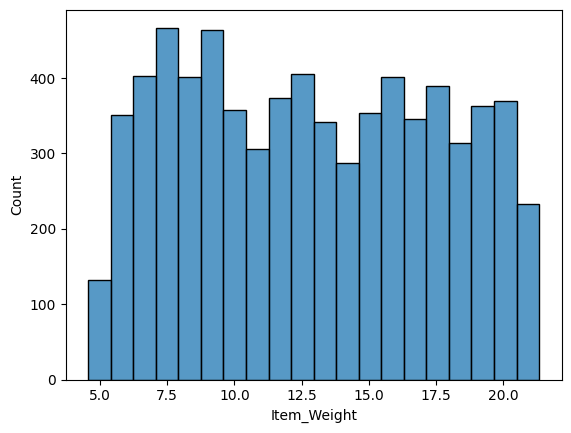

In [20]:
ax = sns.histplot(data = df, x = 'Item_Weight')

###5) Check mean and medium weight to identify the value to fill in


In [21]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


12.6 looks to be a more accurate value based on the histogram distribution



###6) Fill in the weight with the median value

In [22]:
median_value = df['Item_Weight'].median()
df['Item_Weight'] = df['Item_Weight'].fillna(median_value)

###7) Check for any blanks

In [23]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Histogram to view distributions

Text(0, 0.5, 'Count of Sale')

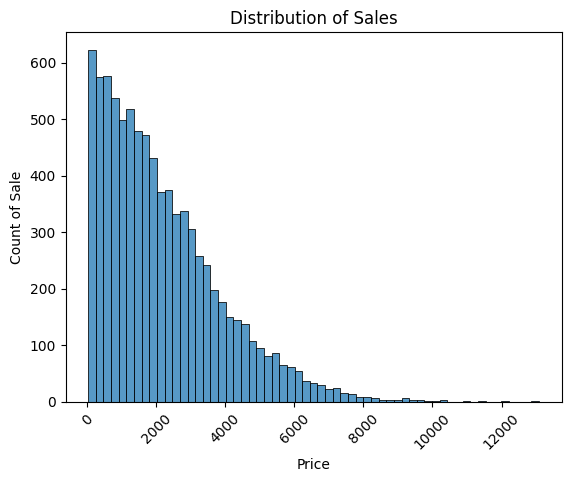

In [10]:
# Use seaborn to load the histogram
ax = sns.histplot(data=df, x='Item_Outlet_Sales')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Distribution of Sales')
ax.set_xlabel('Price')
ax.set_ylabel('Count of Sale')

Interpretation: More lower priced items are sold

##Boxplots to view statistical summaries of numerical features in your dataset.

###1) Outlet Type vs Sales

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

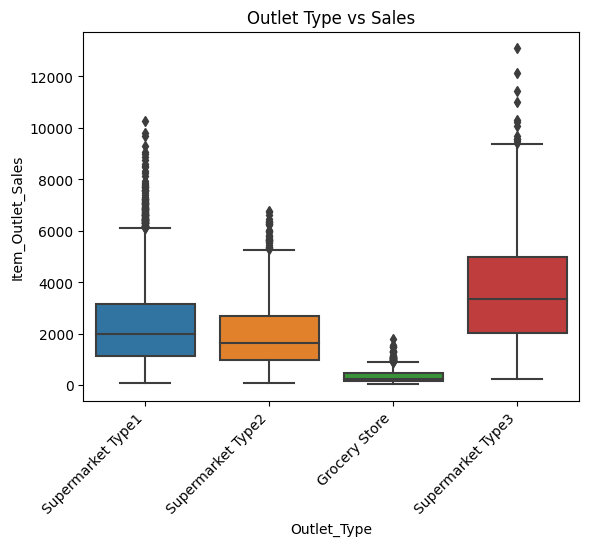

In [11]:
# Create the boxplot using seaborn lib
ax = sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df)
ax.set_title('Outlet Type vs Sales');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

Interpretation: Supermarket Type3 has a higher sale amounts

###2) Outlet Size vs Sales

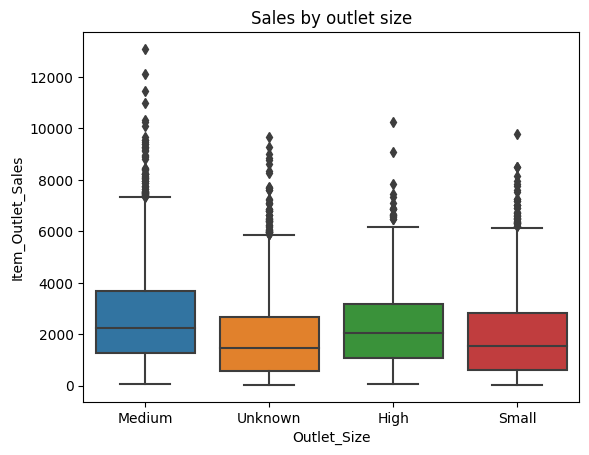

In [33]:
# Create a boxplot of outlet size vs. sales
# Create the boxplot using seaborn lib
ax = sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df)
ax.set_title('Sales by outlet size');

Interpretation: The Medium size Outlet size has higher sales amounts

###3) Item Weight avg

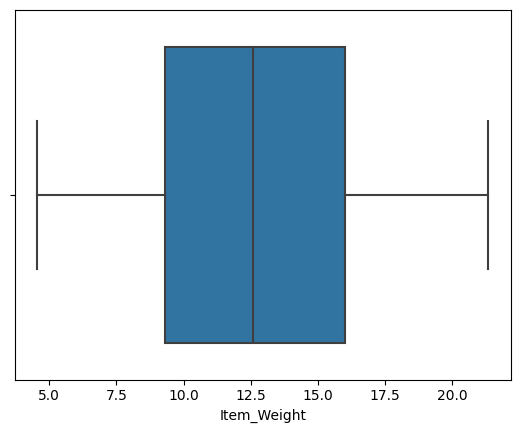

In [34]:
#Boxplot for item weight
ax = sns.boxplot(data=df, x="Item_Weight")

Interpretation: The median is 12.6

## Countplots to view the frequency of each class of categorial features in your dataset.

###1) Countplot by store

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

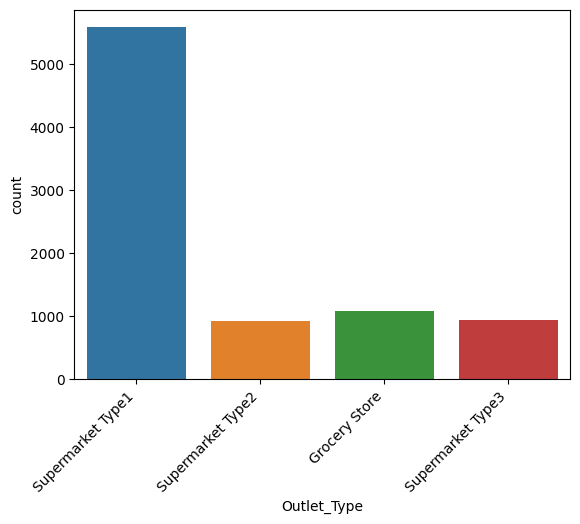

In [13]:
# Make a countplot for store
ax = sns.countplot(data = df, x = 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

Interpretation: Supermarket Type1 has the most items

###2) Countplot by Item Type


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

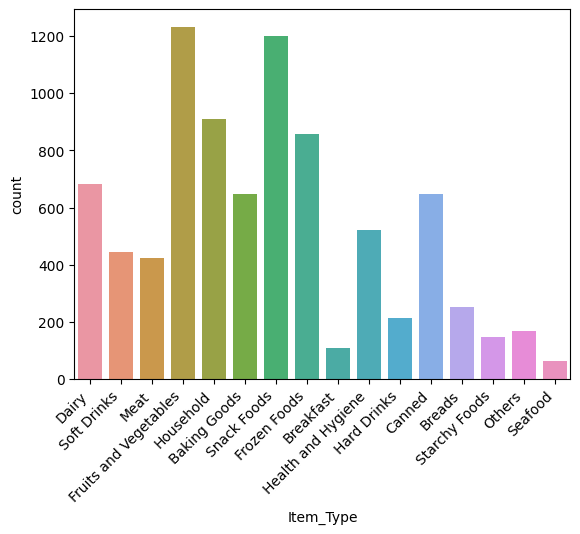

In [14]:
# Make a countplot for store
ax = sns.countplot(data = df, x = 'Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

Interpretation: Fruit and vegetables and snack foods are sold more

## Correlation

### 1\) Correlation Heatmap

Define a variable containing the correlations between variables in the insurance dataset.

In [15]:
# Find correlations
corr = df.corr(numeric_only=True)

[Text(0.5, 1.0, 'Correlation Heatmap')]

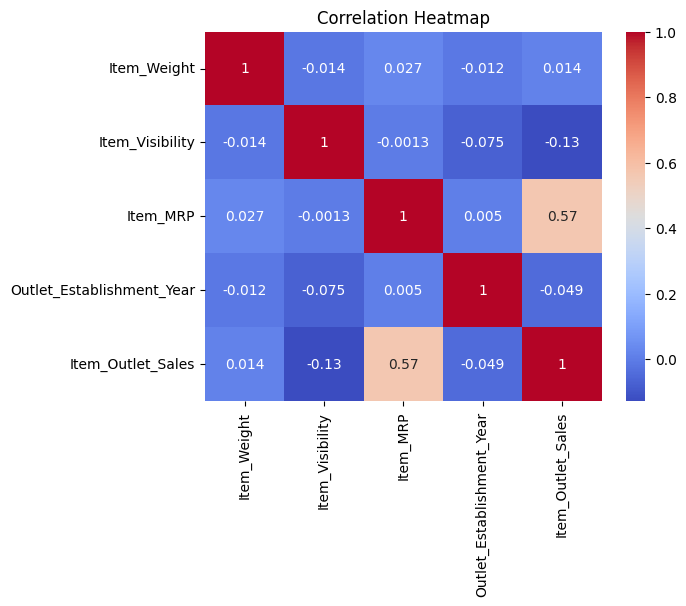

In [16]:
# A heatmap using the correlations from above
ax = sns.heatmap(corr,annot=True, cmap='coolwarm');
ax.set(title='Correlation Heatmap')

Interpretation: Item Outlet Sales and item MRP has a strong positive correlation

Item visibility and Item outlet Sales has a high negative correlation